# Students Exam Scores Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Students Exam Scores.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

##### we require only MathScore, ReadingScore & WritingScore where there are no null values, therefore no need to remove null value columns

In [6]:
# drop unnamed columns

df = df.drop('Unnamed: 0', axis = 1)

In [7]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


## Gender Distribution

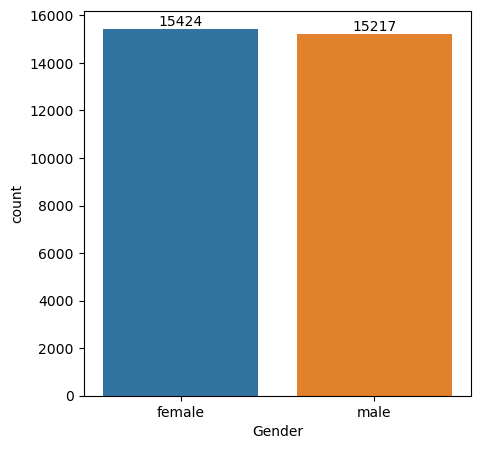

In [8]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.show()

#### from above chart we ahve analysed that the number of females in the data is more than the number of males

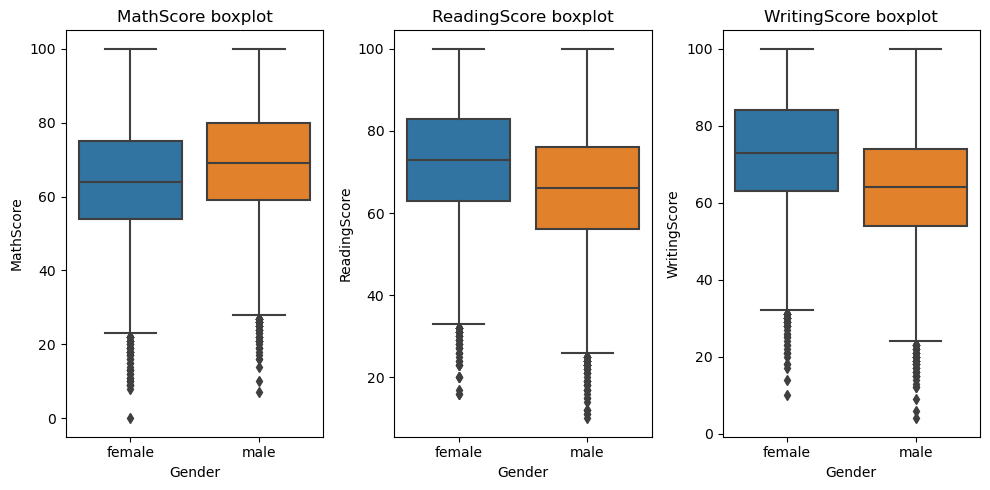

In [9]:
#comparing the test score for each gender

scores = ['MathScore', 'ReadingScore', 'WritingScore']

#create subplots

fig, ax = plt.subplots(1,3, figsize=(10,5))
for indx,s in enumerate(scores):
    sns.boxplot(
        data = df,
        y = s,
        x = 'Gender',
        ax = ax[indx]
    )
    ax[indx].set_title('{} boxplot'.format(s))
    plt.tight_layout(h_pad = 1.1)

In [10]:
df.groupby('Gender')[scores].agg(['min', 'mean', 'median'])

MathScore                   ReadingScore                    \
             min       mean median          min       mean median   
Gender                                                              
female         0  64.080654   64.0           16  72.853216   73.0   
male           7  69.069856   69.0           10  65.854571   66.0   

       WritingScore                    
                min       mean median  
Gender                                 
female           10  72.856457   73.0  
male              4  63.920418   64.0

#### In average, females tend to have better performance on reading and writing testing scores than males. However, males tend to have better scores on math than females.

## Parent Education

In [11]:
gb = df.groupby(['ParentEduc'])[scores].mean().reset_index().sort_values(by=scores, ascending=False)

print(gb)

           ParentEduc  MathScore  ReadingScore  WritingScore
3     master's degree  72.336134     75.832921     76.356896
1   bachelor's degree  70.466627     73.062020     73.331069
0  associate's degree  68.365586     71.124324     70.299099
4        some college  66.390472     69.179708     68.501432
2         high school  64.435731     67.213997     65.421136
5    some high school  62.584013     65.510785     63.632409


In [12]:
plt.figure(figsize=(5,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education And Students Scores")
plt.show()

ValueError: could not convert string to float: "master's degree"

<Figure size 500x500 with 0 Axes>

#### Parents with higher education background, their child/children tend to have higher average scores in math, reading and writing.



In [13]:
df.groupby(['ParentEduc','ParentMaritalStatus'])[scores].mean().sort_values(by=scores, ascending=False)

MathScore  ReadingScore  WritingScore
ParentEduc         ParentMaritalStatus                                       
bachelor's degree  widowed              75.587500     76.587500     77.125000
master's degree    divorced             72.790960     77.203390     77.872881
                   married              72.439591     75.605019     76.085502
                   widowed              72.361702     76.829787     76.978723
                   single               71.941558     75.409091     75.965368
bachelor's degree  married              70.677507     73.107317     73.394038
                   divorced             70.252727     73.401818     73.803636
                   single               69.322165     72.029639     72.139175
associate's degree single               68.680963     71.553800     70.715576
                   divorced             68.347575     70.919169     70.321016
                   married              68.267255     70.989859     70.130847
                   widowed              67.666667     72.363636     71.101010
some college       widowed              66.925000     68.458333     67.425000
                   married              66.711892     69.404595     68.714865
                   divorced             66.269981     69.199805     68.702729
                   single               65.795798     68.787262     68.057781
high school        married              64.609170     67.410388     65.642514
                   single               64.423227     67.213562     65.397506
                   divorced             64.255144     67.100823     65.282922
some high school   widowed              63.955357     65.125000     63.294643
                   divorced             63.191657     66.229989     64.408117
high school        widowed              62.920792     64.811881     62.514851
some high school   married              62.556073     65.405324     63.514143
                   single               62.000775     65.241673     63.396592

#### By considering parents material status given parents' education, the average testing scores have great impact by that. For example, focusing on master's degree, students in widowed group perform the best average testing scores than that in other groups.

## Distribution of Ethnic Group

In [15]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


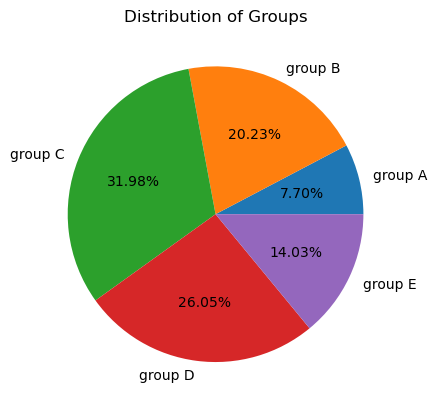

In [16]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["group A", "group B","group C","group D","group E"]
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.title("Distribution of Groups")
plt.pie(mlist, labels = l, autopct='%1.2f%%')
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

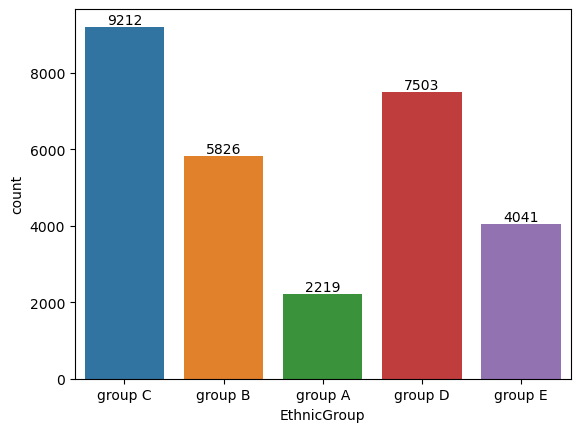

In [17]:
ax = sns.countplot(data = df, x ='EthnicGroup')
ax.bar_label(ax.containers[0])

### from the above chart we can see that most of the students are from group C

In [18]:
df.groupby(['ParentEduc','ParentMaritalStatus', 'EthnicGroup'])[scores].mean().sort_values(by=scores, ascending=False).head(10)

MathScore  ReadingScore  \
ParentEduc         ParentMaritalStatus EthnicGroup                            
bachelor's degree  widowed             group E      83.850000     81.900000   
master's degree    married             group E      81.559055     81.212598   
some college       widowed             group E      80.666667     76.000000   
master's degree    divorced            group E      80.479167     81.687500   
                   single              group E      80.457627     78.644068   
bachelor's degree  married             group E      78.758755     77.291829   
                   divorced            group E      77.724638     75.405797   
                   single              group E      77.421569     75.990196   
associate's degree widowed             group E      77.411765     81.705882   
high school        widowed             group E      77.076923     73.000000   

                                                    WritingScore  
ParentEduc         ParentMaritalStatus EthnicGroup                
bachelor's degree  widowed             group E         80.300000  
master's degree    married             group E         81.984252  
some college       widowed             group E         75.666667  
master's degree    divorced            group E         81.833333  
                   single              group E         79.135593  
bachelor's degree  married             group E         76.723735  
                   divorced            group E         75.115942  
                   single              group E         75.715686  
associate's degree widowed             group E         80.176471  
high school        widowed             group E         69.230769

#### EthicGroup is also a significant factor impacting Math, Reading, and Writing scores. The top 10 average scores of these three subjects from diverse family backgrounds, ethic group E accounts for 9 out of 10.

## Studying plan

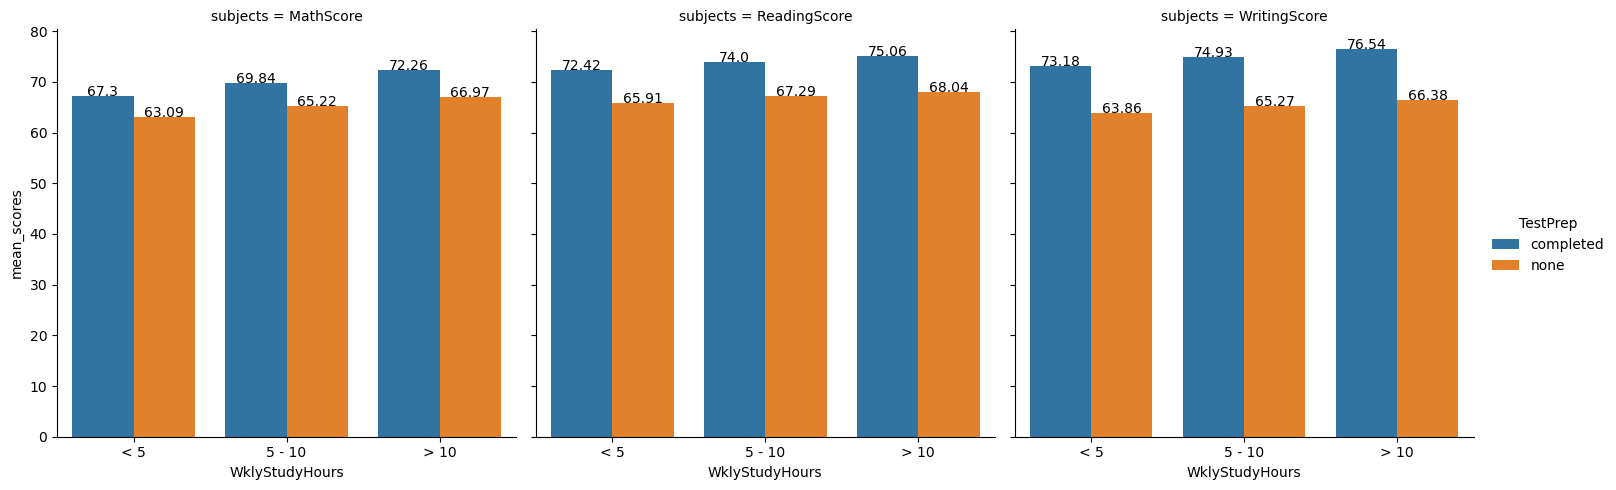

In [19]:
#how  avg scores varied by test preparation, WklyStudyHours?

plan_df = df.groupby(['TestPrep','WklyStudyHours'])[scores].mean().reset_index()

#convet plan_df from wide to long

plan_df = plan_df.melt(id_vars = ['TestPrep', 'WklyStudyHours'], value_vars = scores, var_name='subjects', value_name='mean_scores')

#seaborn catplot

fig = sns.catplot(
    data = plan_df,
    y = 'mean_scores',
    x = 'WklyStudyHours',
    hue = 'TestPrep',
    order= ['< 5', '5 - 10', '> 10'],
    col = 'subjects',
    kind = 'bar'
)

# Add the values on top of the bars

for ax in fig.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2, p.get_height(), round(p.get_height(), 2), ha='center')

plt.show()

#### Students with test preparation tend to have higher avarage scores in Math, Reading and Writing. Students spend more time on each subject, the average scores tend to be higher than those students spend less time on subjects. There is a significant improvement on average math score as students invest more time on it. However, the improvement of average reading and writing tend to grow slowly when students spend more time on them.



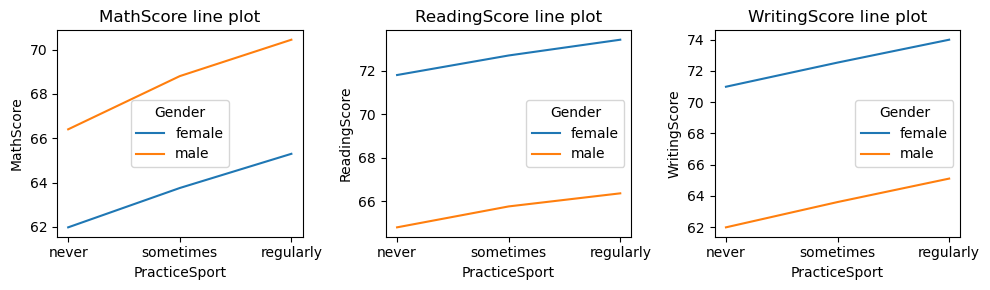

In [20]:
#practice sports make score better?
#extract scores based on practicesport on each gender

sport_df = pd.pivot_table(df, values = scores, 
                          index = ['Gender','PracticeSport'], aggfunc='mean').reset_index().sort_values(
    by=['Gender','MathScore'], ascending=True)

#create figs

fig, ax = plt.subplots(1,3, figsize=(10, 3))

for indx, val in enumerate(scores):
    sns.lineplot(
        data = sport_df,
        x = 'PracticeSport',
        y = val,
        hue = 'Gender',
        ax = ax[indx]
    )
    ax[indx].set_title("{} line plot".format(val))
    plt.tight_layout(w_pad = 1.2)

#### Interestingly, the data indicates that regular exercises have a certain degree impacting on students's scores on Math, Reading and Writing. Students with higher frequency of pracitce sport, they tend to have better average scores on these three subjects.



## Number Of Siblings
#### trying to find any impact on students scores due to the Nr Siblings.

In [21]:
gb1 = df.groupby("NrSiblings").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

            MathScore  ReadingScore  WritingScore
NrSiblings                                       
0.0         66.819449     69.547812     68.746515
1.0         66.473896     69.259097     68.245345
2.0         66.554934     69.472018     68.522533
3.0         66.719092     69.488159     68.650498
4.0         66.245495     69.144169     68.073444
5.0         66.630303     69.453788     68.282576
6.0         65.917219     68.801325     67.860927
7.0         67.615120     69.828179     68.986254


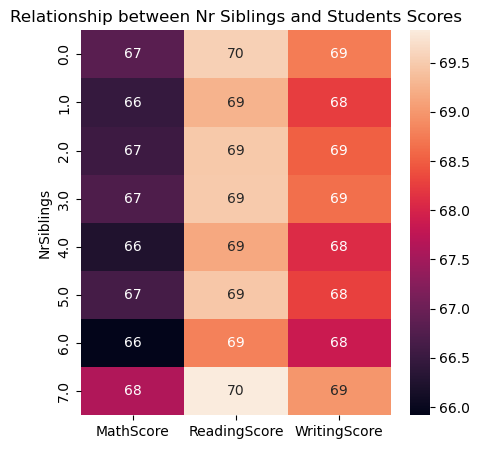

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Nr Siblings and Students Scores")
plt.show()

#### From the above chart we can see that there is no/negligible impact on students scores due to number of siblings

# First Child
#### Here we find any relation between students scores and the position of the student in the family.

In [23]:
gb2 = df.groupby("IsFirstChild").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb2)

              MathScore  ReadingScore  WritingScore
IsFirstChild                                       
no            66.246832     69.132614     68.210887
yes           66.740646     69.542553     68.558484


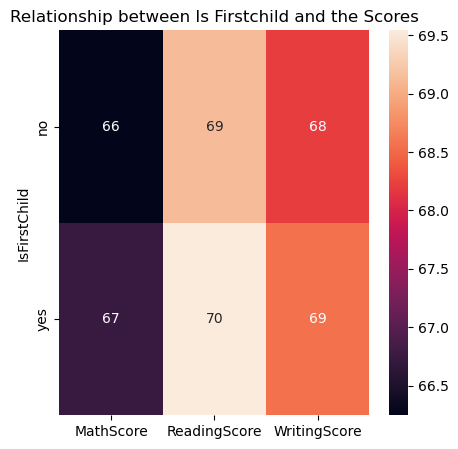

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Is Firstchild and the Scores")
plt.show()

#### The above chart shown that there is no/negligble impact on the test scores based on the childs position.

# Lunch Type
#### Relation between Lunch type and test scores

In [25]:
gb3 = df.groupby("LunchType").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb3)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


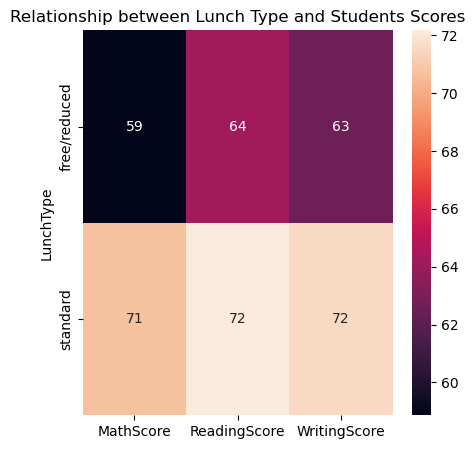

In [26]:
plt.figure(figsize=(5,5))
sns.heatmap(gb3,annot=True)
plt.title("Relationship between Lunch Type and Students Scores")
plt.show()

#### The above chart shown that the students of standared Lunch type scored more than free/reduced students

# Transport Means
#### In this case we find the impact transport to the school

In [27]:
gb4 = df.groupby("TransportMeans").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
print(gb4)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


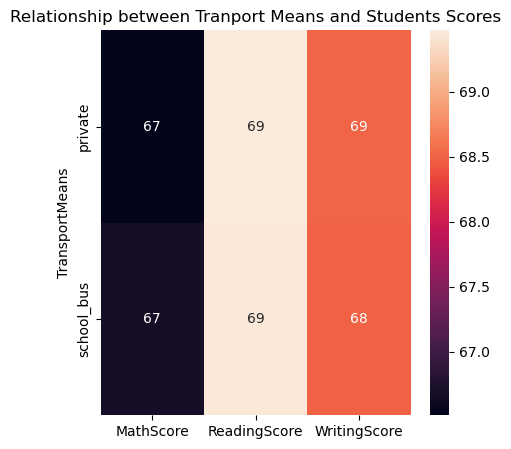

In [28]:
plt.figure(figsize=(5,5))
sns.heatmap(gb4,annot=True)
plt.title("Relationship between Tranport Means and Students Scores")
plt.show()

#### From the above chart we have to conclude that there is no impact due to mode of transport